In [3]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("/data/insurance.csv")
df

age  gender     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
5      31  female  25.740         0     no  southeast   3756.62160
6      46  female  33.440         1     no  southeast   8240.58960
7      37  female  27.740         3     no  northwest   7281.50560
8      37    male  29.830         2     no  northeast   6406.41070
9      60  female  25.840         0     no  northwest  28923.13692
10     25    male  26.220         0     no  northeast   2721.32080
11     62  female  26.290         0    yes  southeast  27808.72510
12     23    male  34.400         0     no  southwest   1826.84300
13     56  female  39.820         0     no  southeast  11090.71780
14     27    male  42.130         0    yes  southeast  39611.75770
15     19    male  24.600         1     no  southwest   1837.23700
16     52  female  30.780         1     no  northeast  10797.33620
17     23    male  23.845         0     no  northeast   2395.17155
18     56    male  40.300         0     no  southwest  10602.38500
19     30    male  35.300         0    yes  southwest  36837.46700
20     60  female  36.005         0     no  northeast  13228.84695
21     30  female  32.400         1     no  southwest   4149.73600
22     18    male  34.100         0     no  southeast   1137.01100
23     34  female  31.920         1    yes  northeast  37701.87680
24     37    male  28.025         2     no  northwest   6203.90175
25     59  female  27.720         3     no  southeast  14001.13380
26     63  female  23.085         0     no  northeast  14451.83515
27     55  female  32.775         2     no  northwest  12268.63225
28     23    male  17.385         1     no  northwest   2775.19215
29     31    male  36.300         2    yes  southwest  38711.00000
...   ...     ...     ...       ...    ...        ...          ...
1308   25  female  30.200         0    yes  southwest  33900.65300
1309   41    male  32.200         2     no  southwest   6875.96100
1310   42    male  26.315         1     no  northwest   6940.90985
1311   33  female  26.695         0     no  northwest   4571.41305
1312   34    male  42.900         1     no  southwest   4536.25900
1313   19  female  34.700         2    yes  southwest  36397.57600
1314   30  female  23.655         3    yes  northwest  18765.87545
1315   18    male  28.310         1     no  northeast  11272.33139
1316   19  female  20.600         0     no  southwest   1731.67700
1317   18    male  53.130         0     no  southeast   1163.46270
1318   35    male  39.710         4     no  northeast  19496.71917
1319   39  female  26.315         2     no  northwest   7201.70085
1320   31    male  31.065         3     no  northwest   5425.02335
1321   62    male  26.695         0    yes  northeast  28101.33305
1322   62    male  38.830         0     no  southeast  12981.34570
1323   42  female  40.370         2    yes  southeast  43896.37630
1324   31    male  25.935         1     no  northwest   4239.89265
1325   61    male  33.535         0     no  northeast  13143.33665
1326   42  female  32.870         0     no  northeast   7050.02130
1327   51    male  30.030         1     no  southeast   9377.90470
1328   23  female  24.225         2     no  northeast  22395.74424
1329   52    male  38.600         2     no  southwest  10325.20600
1330   57  female  25.740         2     no  southeast  12629.16560
1331   23  female  33.400         0     no  southwest  10795.93733
1332   52  female  44.700         3     no  southwest  11411.68500
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast

Text(0, 0.5, 'Frequency (normed)')

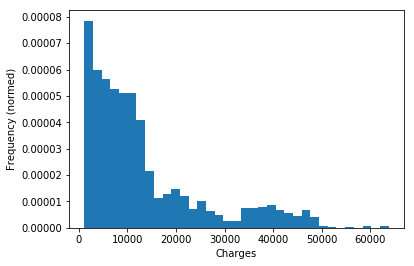

In [18]:
df.charges.plot.hist(density = True, bins = 35)
#plt.vlines(charges_mean, ymin= 0, ymax= 0.00008)
plt.xlabel("Charges")
plt.ylabel("Frequency (normed)")

In [12]:
import numpy as np

In [13]:
charges_mean, charges_std = np.mean(df.charges), np.std(df.charges)

In [10]:
import scipy as sp
from scipy.stats import norm

In [16]:
#norm.rvs(df.charges, loc = charges_mean, scale = charges_std)

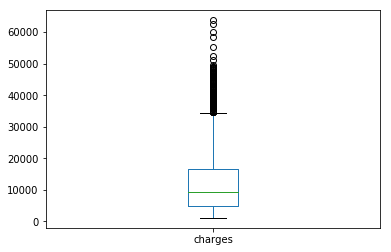

In [19]:
df.charges.plot.box()

In [20]:
y = df.charges

In [24]:
def outlier(y): 
    q1, q2, q3 = np.percentile(y, [25, 50, 75])
    iqr = q3 - q1
    upper_whisker = min(q3 + 1.5 * iqr, np.max(y))
    lower_whisker = max(q1 - 1.5 * iqr, np.min(y))
    return (y < lower_whisker) | (y > upper_whisker)


In [23]:
np.mean(y)

13270.422265141257

In [26]:
df[outlier(y)].shape

(139, 7)

Text(0, 0.5, 'Frequency (normed)')

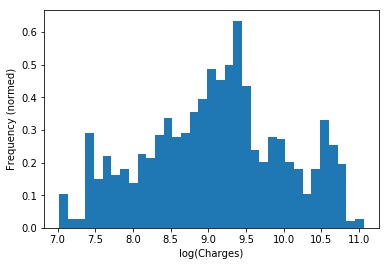

In [28]:
y = np.log(df.charges)
y.plot.hist(density = True, bins = 35)
plt.xlabel("log(Charges)")
plt.ylabel("Frequency (normed)")

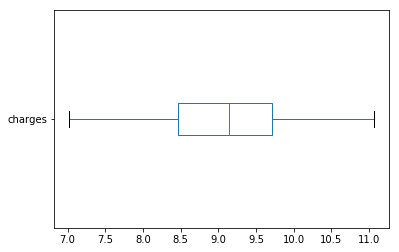

In [32]:
y.plot.box(vert = False)

In [30]:
df[outlier(y)].shape

(0, 7)

Text(0.5, 0, 'log10(charges)')

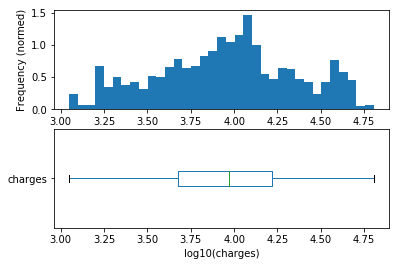

In [36]:
y = np.log10(df.charges)

plt.subplot(211)
y.plot.hist(density = True, bins = 35)
plt.xlabel("log(Charges)")
plt.ylabel("Frequency (normed)")
plt.subplot(212)
y.plot.box(vert = False)
plt.xlabel("log10(charges)")

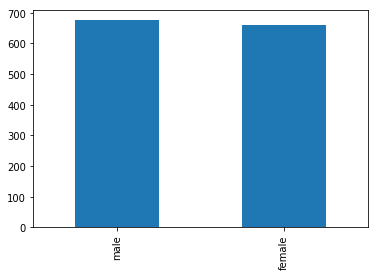

In [39]:
df.gender.value_counts().plot.bar()

Text(0, 0.5, 'Frequency')

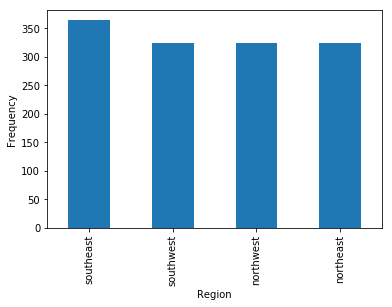

In [41]:
df.region.value_counts().plot.bar()
plt.xlabel("Region")
plt.ylabel("Frequency")

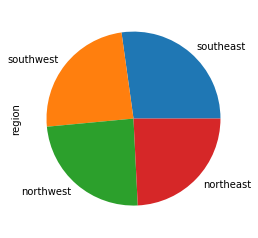

In [42]:
df.region.value_counts().plot.pie()

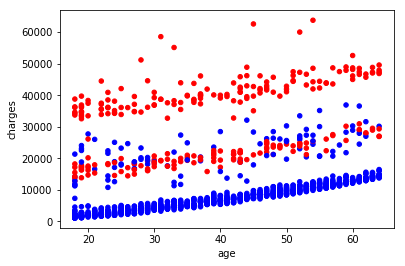

In [47]:
colors = np.where(df.smoker == "yes", "red", "blue")
df.plot.scatter("age","charges", color = colors)

In [48]:
import seaborn as sns

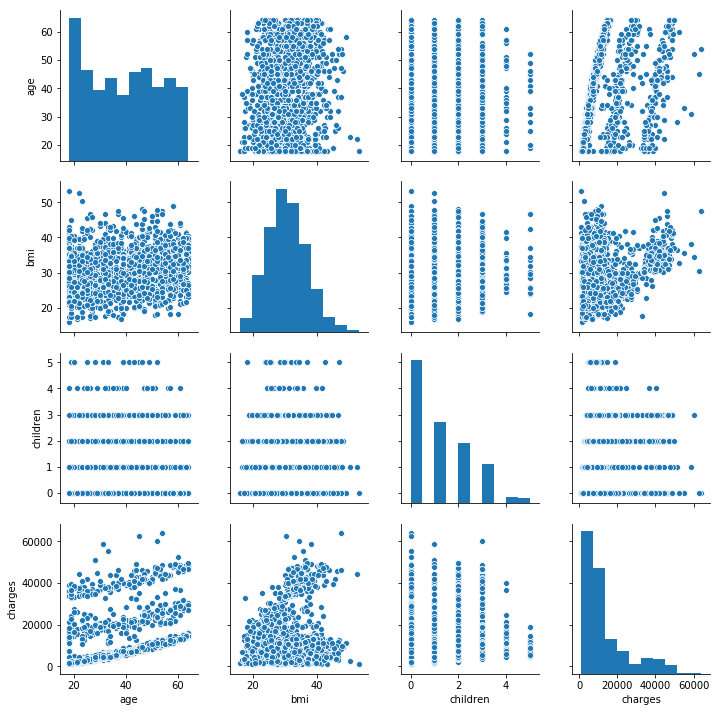

In [49]:
sns.pairplot(df)

Text(0, 0.5, 'Mean(charges)')

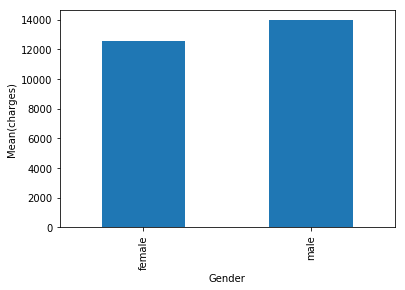

In [51]:
df.groupby("gender").charges.mean().plot.bar()
plt.xlabel("Gender")
plt.ylabel("Mean(charges)")

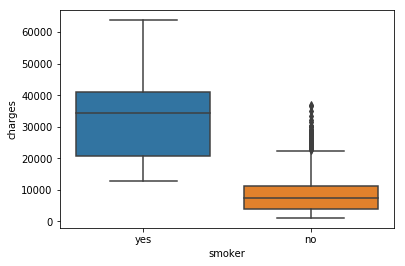

In [55]:
sns.boxplot("smoker", "charges", data = df)

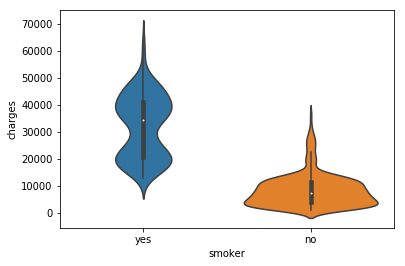

In [54]:
sns.violinplot("smoker", "charges", data = df)

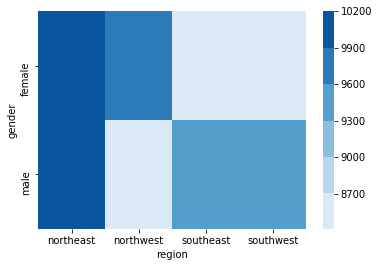

In [61]:
agg = df.groupby(["gender", "region"]).charges.median().unstack()
sns.heatmap(agg, cmap = sns.color_palette("Blues"))

In [62]:
stock = pd.read_csv("/Users/abasar/Downloads/tcs.csv")
stock.head()

Symbol Series         Date  Prev Close  Open Price  High Price  Low Price  \
0    TCS     EQ  07-May-2018     3480.75     3490.00     3490.00     3410.9   
1    TCS     EQ  08-May-2018     3420.95     3434.70     3486.50     3396.7   
2    TCS     EQ  09-May-2018     3441.20     3440.20     3494.75     3440.2   
3    TCS     EQ  10-May-2018     3489.30     3502.95     3511.15     3440.2   
4    TCS     EQ  11-May-2018     3451.25     3454.20     3485.00     3442.5   

   Last Price  Close Price  Average Price  Total Traded Quantity  \
0      3428.0      3420.95        3438.41                1742213   
1      3440.2      3441.20        3447.80                1496410   
2      3488.5      3489.30        3480.95                1307525   
3      3446.3      3451.25        3478.59                1929339   
4      3461.0      3456.95        3461.07                1313938   

       Turnover  No. of Trades  Deliverable Qty  % Dly Qt to Traded Qty  
0  5.990435e+09          95521          1155927                   66.35  
1  5.159322e+09          75803           710340                   47.47  
2  4.551423e+09          74986           754487                   57.70  
3  6.711381e+09          78782          1044165                   54.12  
4  4.547637e+09          44332           734225                   55.88

In [65]:
stock.index = pd.to_datetime(stock.Date)

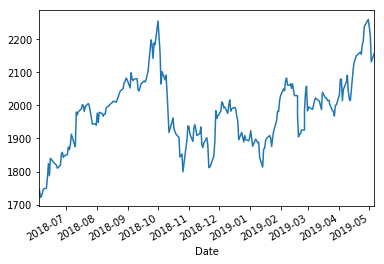

In [69]:
stock[stock.index>"2018-06"]["Close Price"].plot()